In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import networkx as nx

# Extract data

In [2]:
filename = 'normal_dim2_size8'

In [3]:
data = pd.read_csv('data/'+filename+'.csv', header=None).values
pd.DataFrame(data).head()

,0,1
0,1.129290,-2.446577
1,0.258426,0.983161
2,-0.519177,-0.095690
3,0.081358,-0.476422
4,1.933675,1.792641


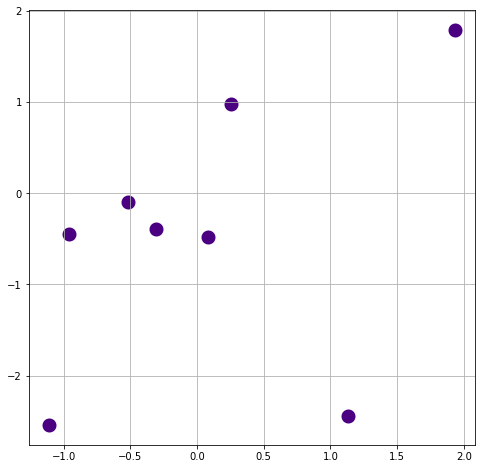

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], color='indigo', linewidth=8)
plt.grid(True)
plt.show()

# Find Simplicies

## Auxiliary geometric functions

In [5]:
def segment_intersect_2d(a1, a2, b1, b2):
    """
    Returns True if segments (a1, a2) and (b1, b2) intersects.
    
    Parameters:
    -----------
    a1 : 2-dimensional float np.ndarray
    
    a2 : 2-dimensional float np.ndarray
    
    b1 : 2-dimensional float np.ndarray
    
    b2 : 2-dimensional float np.ndarray
    
    Returns:
    g : bool
    """
    matrix = np.array([[(a2[1] - a1[1]), - (a2[0] - a1[0])], 
                       [(b2[1] - b1[1]), - (b2[0] - b1[0])]])
    r = np.array([a1[0]*(a2[1] - a1[1]) - a1[1]*(a2[0] - a1[0]), 
                  b1[0]*(b2[1] - b1[1]) - b1[1]*(b2[0] - b1[0])])
    try:
        c = np.linalg.solve(matrix, r)
        return ((a1-c)*(c-a2) > 0).any() and ((b1-c)*(c-b2) > 0).any()
    except np.linalg.LinAlgError:
        matrix = np.concatenate([matrix, r.reshape(1, 2)])
        if np.linalg.matrix_rank(matrix) == 2:
            return False
        return ((a1-b1)*(b1-a2) > 0).any() or ((a1-b2)*(b2-a2) > 0).any()

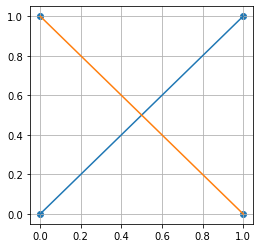

True 



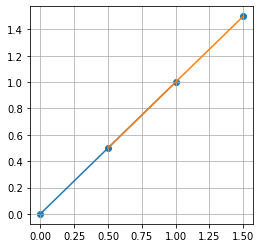

True 



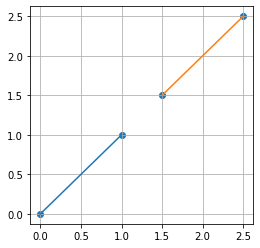

False 



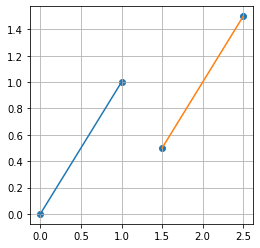

False 



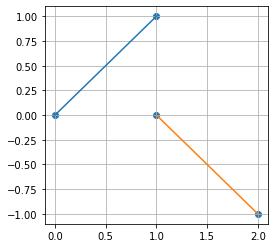

False 



In [6]:
a1, a2, b1, b2 = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])

plt.figure(figsize=(4, 4))
plt.scatter(*np.array([a1, a2, b1, b2]).transpose())
plt.plot([a1[0], a2[0]], [a1[1], a2[1]])
plt.plot([b1[0], b2[0]], [b1[1], b2[1]])
plt.grid(True)
plt.show()
print(segment_intersect_2d(a1, a2, b1, b2), '\n')


a1, a2, b1, b2 = np.array([[0, 0], [1, 1], [0.5, 0.5], [1.5, 1.5]])

plt.figure(figsize=(4, 4))
plt.scatter(*np.array([a1, a2, b1, b2]).transpose())
plt.plot([a1[0], a2[0]], [a1[1], a2[1]])
plt.plot([b1[0], b2[0]], [b1[1], b2[1]])
plt.grid(True)
plt.show()
print(segment_intersect_2d(a1, a2, b1, b2), '\n')


a1, a2, b1, b2 = np.array([[0, 0], [1, 1], [2.5, 2.5], [1.5, 1.5]])

plt.figure(figsize=(4, 4))
plt.scatter(*np.array([a1, a2, b1, b2]).transpose())
plt.plot([a1[0], a2[0]], [a1[1], a2[1]])
plt.plot([b1[0], b2[0]], [b1[1], b2[1]])
plt.grid(True)
plt.show()
print(segment_intersect_2d(a1, a2, b1, b2), '\n')


a1, a2, b1, b2 = np.array([[0, 0], [1, 1], [1.5, 0.5], [2.5, 1.5]])

plt.figure(figsize=(4, 4))
plt.scatter(*np.array([a1, a2, b1, b2]).transpose())
plt.plot([a1[0], a2[0]], [a1[1], a2[1]])
plt.plot([b1[0], b2[0]], [b1[1], b2[1]])
plt.grid(True)
plt.show()
print(segment_intersect_2d(a1, a2, b1, b2), '\n')


a1, a2, b1, b2 = np.array([[0, 0], [1, 1], [1, 0], [2, -1]])

plt.figure(figsize=(4, 4))
plt.scatter(*np.array([a1, a2, b1, b2]).transpose())
plt.plot([a1[0], a2[0]], [a1[1], a2[1]])
plt.plot([b1[0], b2[0]], [b1[1], b2[1]])
plt.grid(True)
plt.show()
print(segment_intersect_2d(a1, a2, b1, b2), '\n')

In [7]:
def get_basis_index_from_matrix(matrix, dim=2):
    """
    Returns dim linearly independent vectors from matrix.
    
    Parameters:
    -----------
    matrix : np.ndarray
    
    dim : int
    """
    for i in itertools.combinations(np.arange(len(matrix)), dim):
        if np.linalg.matrix_rank(matrix[[i]]) == dim:
            return list(i)

In [8]:
def segments_itersect(a1, a2, b1, b2):
    """
    Returns True if segments (a1, a2) and (b1, b2) intersects.
    
    Parameters:
    -----------
    a1 : float np.ndarray
    
    a2 : float np.ndarray
    
    b1 : float np.ndarray
    
    b2 : float np.ndarray
    
    Returns:
    g : bool
    """
    if (len(a1) != len(a2)) or (len(b1) != len(b2)) or (len(a1) != len(b1)):
        raise ValueError("Different dimensions.")
    if len(a1) == 2:
        return segment_intersect_2d(a1, a2, b1, b2)
    matrix = np.array([a1, a2, b1, b2])
    if np.linalg.matrix_rank(matrix) > 2:
        return False
    if np.linalg.matrix_rank(matrix) == 1:
        return ((a1-b1)*(b1-a2) > 0).any() or ((a1-b2)*(b2-a2) > 0).any()
    basis = matrix[get_basis_index_from_matrix(matrix, 2)]
    index = get_basis_index_from_matrix(basis.transpose(), 2)
    return segment_intersect_2d(a1[index], a2[index], b1[index], b2[index])

In [9]:
a1 = np.array([0, 0, 0, 0])
a2 = np.array([1, 1, 1, 1])
b1 = np.array([0, 0, 1, 1])
b2 = np.array([1, 1, 0, 0])
segments_itersect(a1, a2, b1, b2)

/tmp/ipykernel_46332/2805313462.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.linalg.matrix_rank(matrix[[i]]) == dim:


True


## Dimension 1

In [10]:
def radiuses_edged(data, norm=np.linalg.norm):
    """
    Returns matrix of half distances between points (except matching: there is infinite distance)
    
    Parameters:
    -----------
    data : 2-dimensional float np.ndarray
    
    returns:
    matrix : 2-dimensional float np.ndarray
    """
    n = data.shape[0]
    matrix = data*np.ones(np.append(n, data.shape))
    matrix = matrix - matrix.transpose([1, 0, 2])
    matrix = 0.5*norm(matrix, axis=2)
    matrix[matrix == 0] = np.inf
    return matrix

In [11]:
pd.DataFrame(radiuses_edged(data))

,0,1,2,3,4,5,6,7
0,inf,1.769287,1.435628,1.115759,2.157429,1.253988,1.445586,1.119157
1,1.769287,inf,0.664941,0.735142,0.930284,0.743565,0.938157,1.889870
2,1.435628,0.664941,inf,0.355527,1.547763,0.181646,0.280530,1.257644
3,1.115759,0.735142,0.355527,inf,1.464559,0.199487,0.519740,1.191223
4,2.157429,0.930284,1.547763,1.464559,inf,1.565133,1.828256,2.647124
5,1.253988,0.743565,0.181646,0.199487,1.565133,inf,0.325703,1.146589
6,1.445586,0.938157,0.280530,0.519740,1.828256,0.325703,inf,1.050465
7,1.119157,1.889870,1.257644,1.191223,2.647124,1.146589,1.050465,inf


In [12]:
def nonintersected(old_edges, new_edges, data):
    """
    Returns incidence matrix of new edges which are not intersect old edges.
    
    Parameters:
    -----------
    old_edges : bool 2-dimensial np.ndarray
        Incidence matrix for edges
        
    new_edges : bool 2-dimensial np.ndarray
        Incidence matrix for edges
        
    data : 2-dimensional float np.ndarray
    
    Returns:
    --------
    matrix : bool 2-dimensial np.ndarray
        Incidence matrix for edges
    """
    new_edges = np.logical_and(new_edges, np.logical_not(old_edges))
    new_edges_list = np.unique(np.sort(np.array(np.where(new_edges)).transpose(), axis=1), axis=0)
    old_edges_list = np.unique(np.sort(np.array(np.where(old_edges)).transpose(), axis=1), axis=0)
    matrix = np.zeros(new_edges.shape).astype(bool)
    for new_edge in new_edges_list:
        g = True
        a1 = data[new_edge[0]]
        a2 = data[new_edge[1]]
        for old_edge in old_edges_list:
            b1 = data[old_edge[0]]
            b2 = data[old_edge[1]]
            if segments_itersect(a1, a2, b1, b2):
                g = False
                break;
        matrix[new_edge[0], new_edge[1]] = g
        matrix[new_edge[1], new_edge[0]] = g
    return matrix

In [13]:
old_edges = radiuses_edged(data) < 0.6
new_edges = radiuses_edged(data) < 1.6
nonintersected(old_edges, new_edges, data)

array([[False, False, False, False, False, False,  True,  True],
       [False, False,  True, False,  True, False,  True, False],
       [False,  True, False, False,  True, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False,  True],
       [ True, False, False, False, False, False,  True, False]])

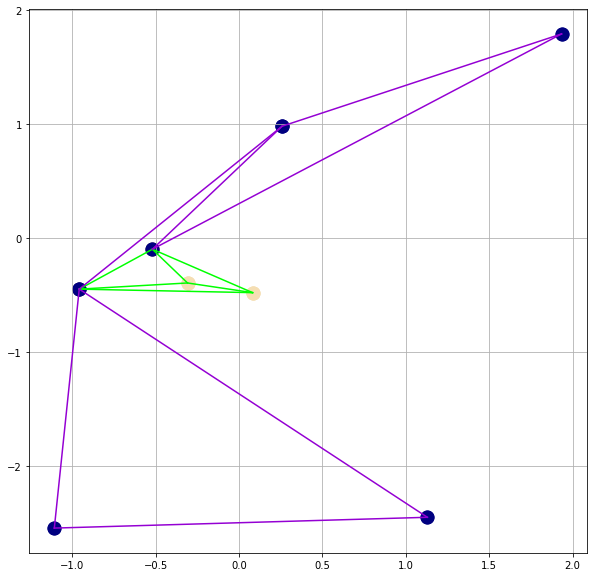

In [14]:
plt.figure(figsize=(10, 10))
for edge in np.unique(np.sort(np.array(np.where(old_edges)).transpose(), axis=1), axis=0):
    plt.scatter(*data[edge[0]], color='wheat', linewidth=8)
    plt.scatter(*data[edge[1]], color='wheat', linewidth=8)
    plt.plot([data[edge[0]][0], data[edge[1]][0]], [data[edge[0]][1], data[edge[1]][1]], color='lime')
for edge in np.unique(np.sort(np.array(np.where(nonintersected(old_edges, new_edges, data))).transpose(), axis=1), axis=0):
    plt.scatter(*data[edge[0]], color='navy', linewidth=8)
    plt.scatter(*data[edge[1]], color='navy', linewidth=8)
    plt.plot([data[edge[0]][0], data[edge[1]][0]], [data[edge[0]][1], data[edge[1]][1]], color='darkviolet')

plt.grid(True)
plt.show()

## Dimension 2

In [15]:
def framed_triangles(edges_matrix):
    """
    Returns incidence 3d-matrix for triangles
    
    Parameters:
    -----------
    edges_matrix : bool 2-dimensial np.ndarray
        Incidence matrix for edges
    
    Returns:
    --------
    framed : bool 3-dimensial np.ndarray
        Incidence matrix for triangles
    """
    matrix = edges_matrix*np.ones(np.append(edges_matrix.shape, edges_matrix.shape[0]))
    axeses = [(0, 1, 2), (1, 2, 0), (2, 0, 1)]
    framed = np.array([matrix.transpose(axes) for axes in axeses])
    framed = np.min(framed, axis=0).astype(bool)
    return framed

# Search simplex spaces

In [62]:
def get_radiuses_spaces_2d(data, norm=np.linalg.norm):
    """
    Returns dict: keys are radiuses.
    
    Parameters:
    -----------
    data : np.2darray
        Income data, array of verticies.
    
    norm : function
        Matrix or vector norm.
    
    Returns:
    --------
        res : Dictionary
    --------
    """
    # Без учёта разрывов в треугольниках
    radiuses = np.unique(radiuses_edged(data, norm))
    radiuses = radiuses[radiuses < np.inf]
    res = {
        0 : {0 : np.arange(len(data)), 
             1 : np.zeros([len(data), len(data)], dtype=bool), 
             2 : np.zeros([len(data), len(data), len(data)], dtype=bool)}
    }
    for radius in radiuses:
        new_edges = radiuses_edged(data, norm) <= radius
        old_radius = np.array([r for r in res])[-1]
        old_edges = res[old_radius][1]
        edges_matrix = np.logical_or(old_edges, nonintersected(old_edges, new_edges, data))
        triangles = framed_triangles(edges_matrix)
        changed = (old_edges != edges_matrix).any()
        if changed:
            res.update({radius : {0 : np.arange(len(data)),
                                  1 : edges_matrix, 
                                  2 : triangles}})
    for radius in res:
        for i in range(1, 3):
            res[radius][i] = np.unique(np.sort(np.array(np.where(res[radius][i])).transpose(), axis=1), axis=0)
    return res

In [63]:
spaces = get_radiuses_spaces_2d(data)

# Components

In [65]:
def number_connected_components(space):
    """
    Returns number of connected components.
    
    Parameters:
    -----------
    space : dict
        Simplex space. Keys are dimensions, values are list of simplicies
    
    Returns:
    --------
    num : int
        Number of connected components.
    """
    graph = nx.Graph()
    graph.add_nodes_from(space[0])
    graph.add_edges_from(space[1])
    num = nx.algorithms.components.number_connected_components(graph)
    return num

# Results

In [66]:
pd.DataFrame({'Radius' : [r for r in spaces],
              'Simplices dim 0' : [len(spaces[r][0]) for r in spaces], 
              'Simplices dim 1' : [len(spaces[r][1]) for r in spaces], 
              'Simplices dim 2' : [len(spaces[r][2]) for r in spaces], })
#              'Connected components' : [number_connected_components(spaces[r])  for r in spaces]})

,Radius,Simplices dim 0,Simplices dim 1,Simplices dim 2
0,0.000000,8,0,0
1,0.181646,8,1,0
2,0.199487,8,2,0
3,0.280530,8,3,0
4,0.519740,8,4,0
5,0.664941,8,5,0
6,0.930284,8,6,0
7,0.938157,8,7,1
8,1.050465,8,8,1
9,1.547763,8,9,2


# Visualization

In [67]:
from visualization import *
import imageio

In [68]:
visible_radiuses = np.arange(0, 2.46, 0.05)
len(visible_radiuses)

50

In [69]:
for radius in visible_radiuses:
    space_radius = np.array([r for r in spaces])
    space_radius = space_radius[space_radius <= radius]
    space_radius = np.max(space_radius)
    
    space = spaces[space_radius]
    edges = space[1]
    triangles = space[2]
    
    plt.figure(figsize=(12, 12))
    plt.title('$R = ' + str('{:.3f}'.format(radius)) +'$', fontdict={'fontsize':24})
    draw_balls(data, radius, color='orchid', alpha=0.15, ax=plt)
    draw_simplicies(data, edges=edges, triangles=triangles)
    plt.grid(True)
    plt.savefig('pics/' + filename + str(radius).replace('.', '_') + '.png')
    plt.close()

In [70]:
images = [imageio.imread('pics/' + filename + str(radius).replace('.', '_') + '.png') for radius in visible_radiuses]
imageio.mimsave(filename + '.gif', images)

# Итог

1. Так и не решил нормально вопросы о пересчении рёбер.
2. Нет предпосылок к решению задачи нахождения дырок.